<a href="https://colab.research.google.com/github/Heisenberg0203/ML_Home_Credit_RISK/blob/master/application_train_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rushikesh0203","key":"a57a54502e5e03998e7362e6218d1695"}'}

In [3]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle competitions download -c iiitb2020-home-credit-default-risk -p /content

 93% 73.0M/78.9M [00:04<00:00, 13.2MB/s]
100% 78.9M/78.9M [00:04<00:00, 18.7MB/s]
 39% 5.00M/12.9M [00:01<00:02, 3.61MB/s]
100% 12.9M/12.9M [00:01<00:00, 8.88MB/s]
 71% 33.0M/46.4M [00:01<00:00, 15.6MB/s]
100% 46.4M/46.4M [00:01<00:00, 24.6MB/s]
 96% 113M/117M [00:03<00:00, 25.0MB/s] 
100% 117M/117M [00:04<00:00, 30.6MB/s]
 97% 273M/283M [00:08<00:00, 23.7MB/s]
100% 283M/283M [00:08<00:00, 36.6MB/s]
 96% 142M/147M [00:04<00:00, 33.4MB/s]
100% 147M/147M [00:05<00:00, 26.5MB/s]
 37% 9.00M/24.0M [00:00<00:00, 93.5MB/s]
100% 24.0M/24.0M [00:00<00:00, 117MB/s] 
 95% 101M/106M [00:04<00:00, 17.1MB/s] 
100% 106M/106M [00:05<00:00, 19.4MB/s]
  0% 0.00/380k [00:00<?, ?B/s]
100% 380k/380k [00:00<00:00, 104MB/s]


In [6]:
!unzip \*.zip

Archive:  application_test.csv.zip
  inflating: application_test.csv    

Archive:  sample_submission.csv.zip
  inflating: sample_submission.csv   

Archive:  bureau_balance.csv.zip
  inflating: bureau_balance.csv      

Archive:  POS_CASH_balance.csv.zip
  inflating: POS_CASH_balance.csv    

Archive:  installments_payments.csv.zip
  inflating: installments_payments.csv  

Archive:  application_train.csv.zip
  inflating: application_train.csv   

Archive:  credit_card_balance.csv.zip
  inflating: credit_card_balance.csv  

Archive:  previous_application.csv.zip
  inflating: previous_application.csv  

Archive:  bureau.csv.zip
  inflating: bureau.csv              

9 archives were successfully processed.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [8]:
application_train = pd.read_csv("/content/application_train.csv")


In [9]:
print("Application Shape: ", application_train.shape)


Application Shape:  (199882, 122)


In [10]:
application_train.columns.to_list()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [11]:
pd.set_option('max_columns', None)
application_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0     aou6ud       0         Cash loans           M            N   
1     xxbaad       0         Cash loans           F            N   
2     xdrbad       0         Cash loans           F            N   
3     rbdd7d       0         Cash loans           F            N   
4     rexddr       1         Cash loans           F            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          360000.0   1125000.0      33025.5   
1               Y             0          112500.0    251280.0      13630.5   
2               Y             0          225000.0    544491.0      15916.5   
3               N             2          211500.0    900000.0      26316.0   
4               Y             0           90000.0    113760.0       8406.0   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0        1125000.0  Spouse, partner  Commercial associate   
1         180000.0           Family               Working   
2         454500.0    Unaccompanied  Commercial associate   
3         900000.0    Unaccompanied               Working   
4          90000.0    Unaccompanied               Working   

             NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0               Higher education            Married  House / apartment   
1  Secondary / secondary special            Married  House / apartment   
2  Secondary / secondary special     Civil marriage  House / apartment   
3  Secondary / secondary special            Married  House / apartment   
4  Secondary / secondary special            Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.022800      -18943          -7369            -2353.0   
1                    0.022625      -13894          -1393            -5698.0   
2                    0.035792      -19821          -2075            -2121.0   
3                    0.006207      -13034          -2205            -1193.0   
4                    0.020713      -18393          -1694            -8279.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2479          NaN           1               1                0   
1            -5698          NaN           1               1                0   
2            -3379          NaN           1               1                1   
3            -4141          NaN           1               1                1   
4            -1890          NaN           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           0           0        Managers              2.0   
1                 1           0           0     Sales staff              2.0   
2                 1           0           0     Sales staff              2.0   
3                 1           0           0        Laborers              4.0   
4                 1           0           0     Sales staff              2.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     2                            2   
2                     2                            2   
3                     2                            2   
4                     3                            3   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       11   
1                  WEDNESDAY                       14   
2                  WEDNESDAY                       16   
3                   THURSDAY                       17   
4                   SATURDAY                       12   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2           

In [12]:
pd.reset_option('max_columns')

In [13]:
application_train.describe()

TARGET  ...  AMT_REQ_CREDIT_BUREAU_YEAR
count  199882.000000  ...               172899.000000
mean        0.081203  ...                    1.903261
std         0.273147  ...                    1.873431
min         0.000000  ...                    0.000000
25%         0.000000  ...                    0.000000
50%         0.000000  ...                    1.000000
75%         0.000000  ...                    3.000000
max         1.000000  ...                   23.000000

[8 rows x 105 columns]

In [54]:
def getCnamesNumeric(df):
    return list(df.select_dtypes(exclude='object').columns)

def getCnamesObject(df):
    return list(df.select_dtypes(include='object').columns)

def getDetailsAboutMissingValuesAllColumns(df):
  return df.isna().sum()/df.shape[0]

def getDetailsAboutOnlyMissingValuesColumns(df):
  print("Shape: ", df.shape)
  return df[list(df.columns[df.isna().any()])].isna().sum()/df.shape[0]

def dropColumns(df, columnNames):
  for column in columnNames:
    df = df.drop(column, axis = 1)
  return df

def imputeCategoricalMissingValuesUsingMode(df):
  columnName = getCnamesObject(df)
  for col in columnName: df[col].fillna(df[col].mode().values[0], inplace = True)

def imputeNumericMissingValuesUsingMean(df):
  columnName = getCnamesNumeric(df)
  for col in columnName: df[col].fillna(df[col].mean(), inplace = True)

def plotCountPlotForCategoricalFeatures(df, cnamesObject):
  number_of_rows = (len(cnamesObject) + 1)/2
  plt.figure(figsize=(20, 6*number_of_rows))

  for i in range(0,len(cnamesObject)):
    plt.subplot(number_of_rows,2,i+1)
    sns.countplot(y=cnamesObject[i], data = df)
    plt.title(cnamesObject[i])
    plt.tight_layout()

def distributionOfCategoricalFeaturesWRTTarget(df, cnamesObject):
  number_of_rows = (len(cnamesObject) + 1)/2
  plt.figure(figsize=(20, 6*number_of_rows))

  for i in range(0,len(cnamesObject)):
    plt.subplot(number_of_rows,2,i+1)
    sns.countplot(data=df, hue="TARGET", y=cnamesObject[i])
    plt.title(cnamesObject[i])
    plt.tight_layout()

def drawCorrelationMatrix(df) :
  length = len(getCnamesNumeric(df))
  correlaionMatrix = df.corr()
  plt.figure(figsize=(length,length*0.8))
  sns.heatmap(correlaionMatrix, annot=True, cmap = 'viridis')

def drawDistributionPlot(df, cnamesNumeric):
  number_of_rows = (len(cnamesNumeric) + 1)/2
  plt.figure(figsize=(20, 4*number_of_rows))

  for i in range(0, len(cnamesNumeric)):
    plt.subplot(number_of_rows,3,i+1)
    sns.kdeplot(df[cnamesNumeric[i]])
    plt.title(cnamesNumeric[i])
    plt.tight_layout()
    

In [15]:
atCC = getCnamesObject(application_train)
print("Number of categorical columns in application_train: ", len(atCC), "\n", atCC)

atNC = getCnamesNumeric(application_train)
print("Number of numerical columns in application_train: ", len(atNC), "\n", atNC)

Number of categorical columns in application_train:  17 
 ['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']
Number of numerical columns in application_train:  105 
 ['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_

In [16]:
atCC.remove('SK_ID_CURR')

In [17]:
application_train[atCC]

NAME_CONTRACT_TYPE CODE_GENDER  ... WALLSMATERIAL_MODE EMERGENCYSTATE_MODE
0              Cash loans           M  ...                NaN                 NaN
1              Cash loans           F  ...                NaN                 NaN
2              Cash loans           F  ...              Panel                  No
3              Cash loans           F  ...                NaN                 NaN
4              Cash loans           F  ...              Panel                  No
...                   ...         ...  ...                ...                 ...
199877         Cash loans           F  ...              Block                  No
199878         Cash loans           F  ...                NaN                 NaN
199879    Revolving loans           F  ...              Panel                  No
199880         Cash loans           F  ...              Panel                  No
199881         Cash loans           F  ...       Stone, brick                  No

[199882 rows x 16 columns]

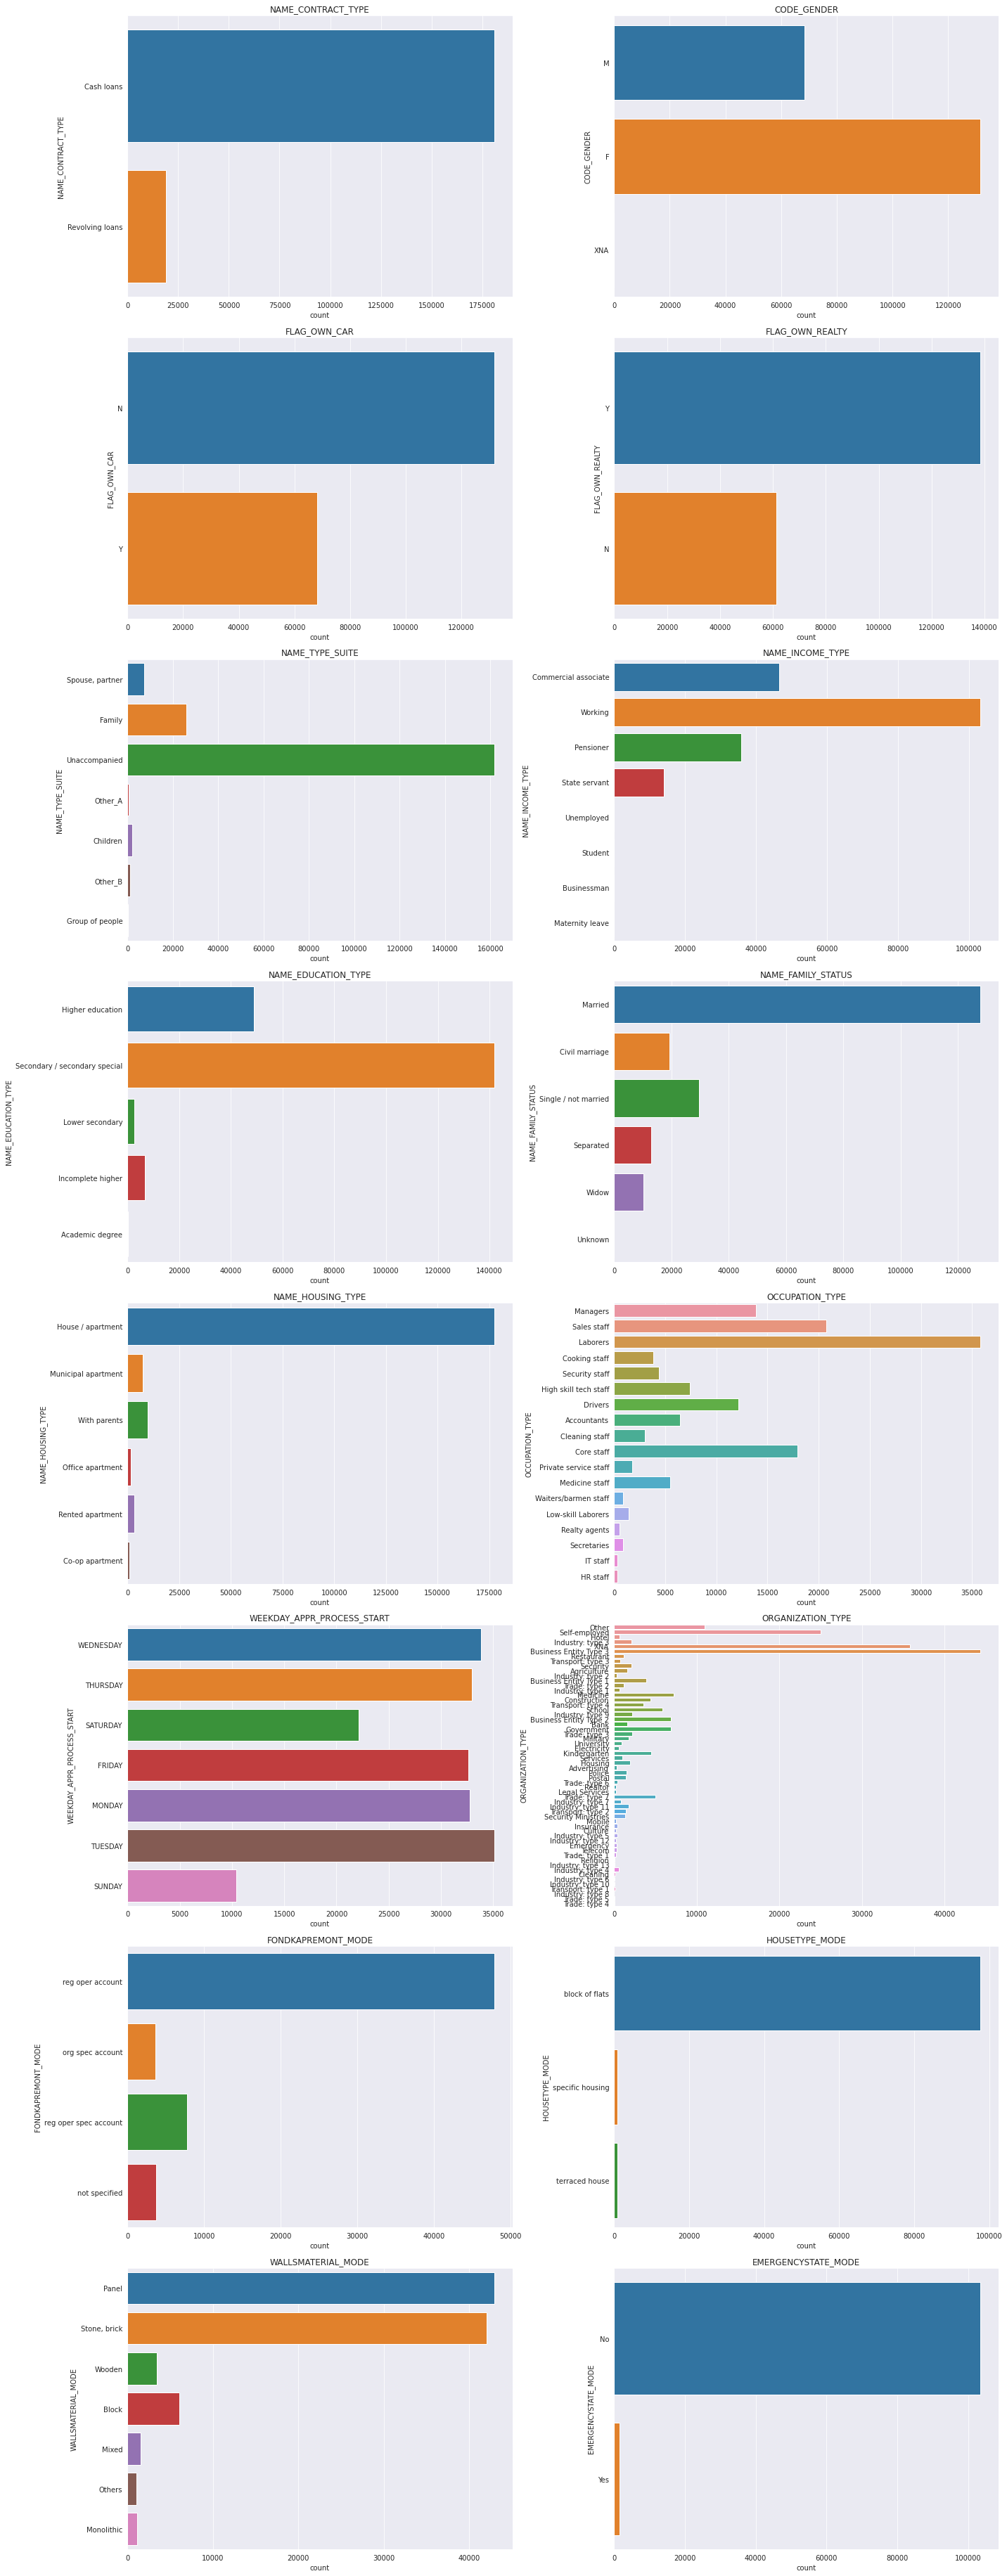

In [18]:
plotCountPlotForCategoricalFeatures(application_train, atCC)

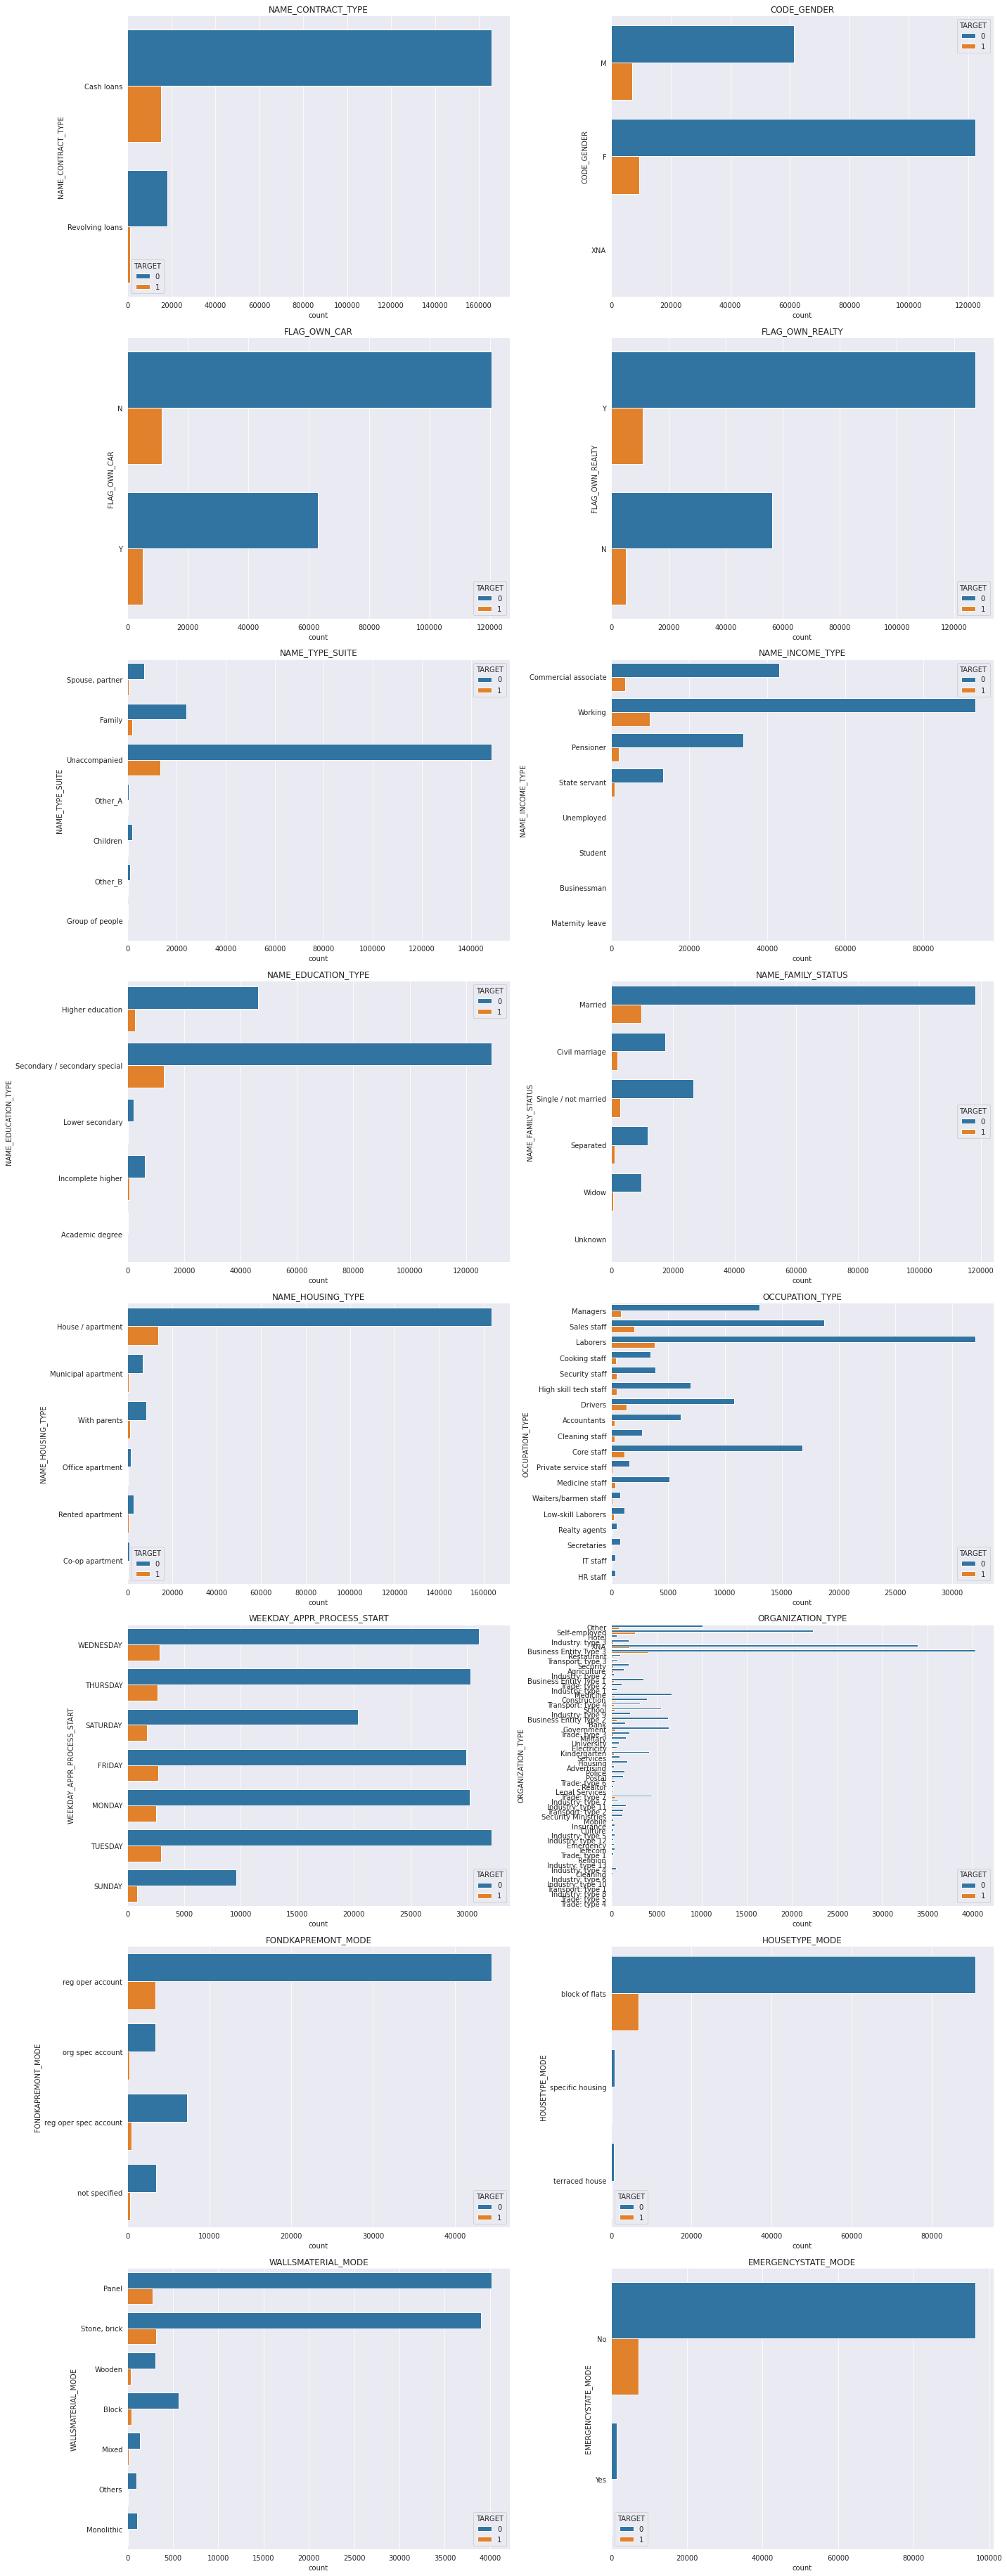

In [19]:
distributionOfCategoricalFeaturesWRTTarget(application_train, atCC)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


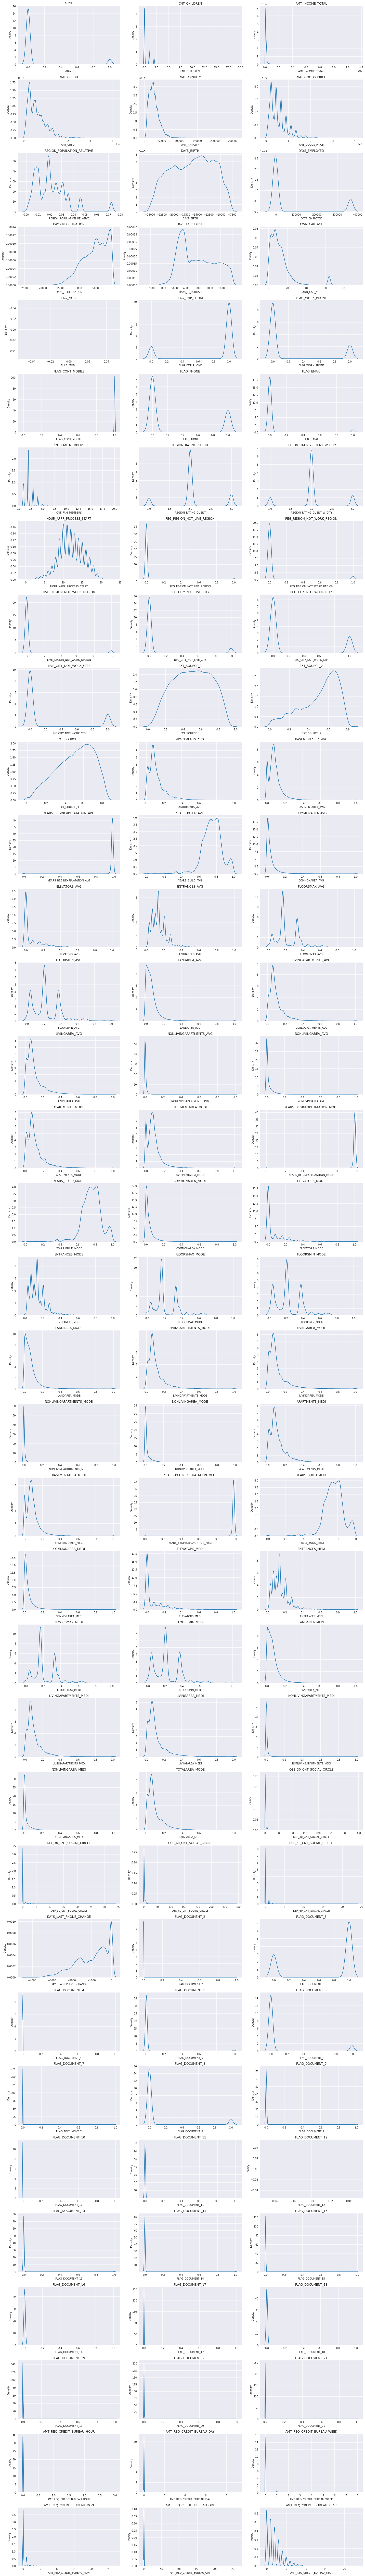

In [20]:
drawDistributionPlot(application_train, atNC)

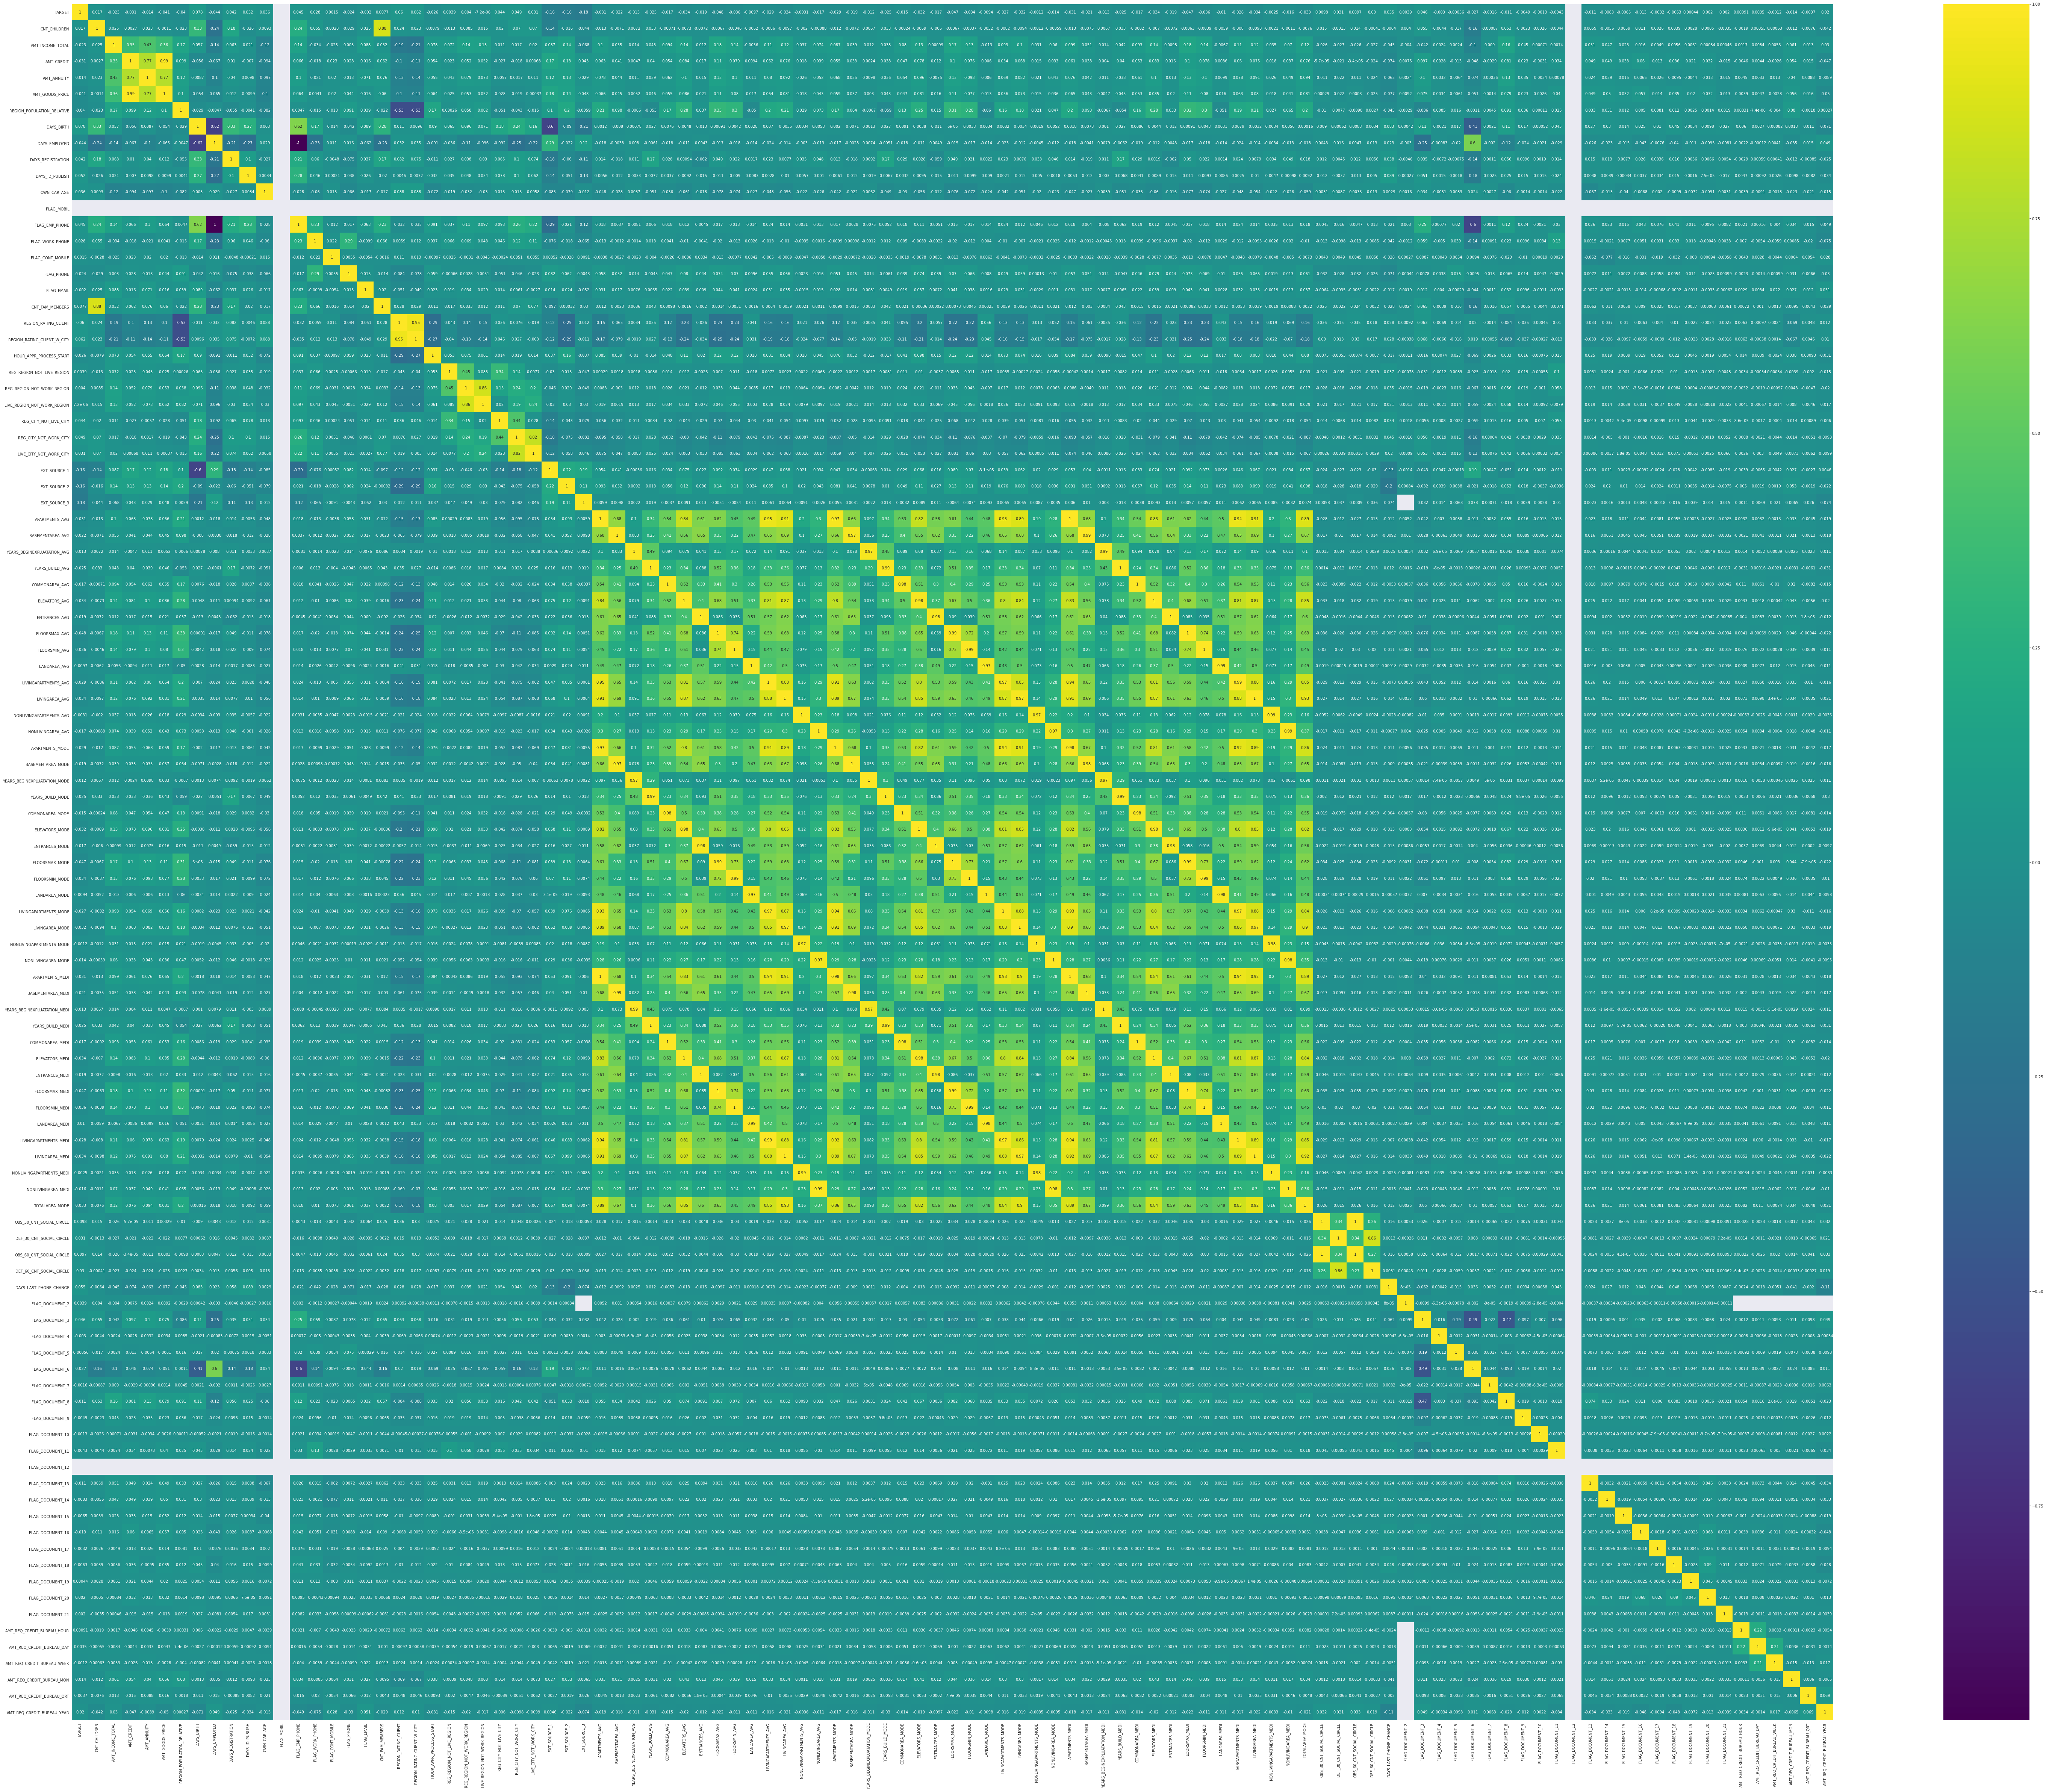

In [21]:
drawCorrelationMatrix(application_train)

In [24]:
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

at_corr=application_train.corr()

In [48]:
def corr_columnwise(df):
  columns = df.columns
  for col in columns:
    at_corr_col = at_corr[col]
    print(col+" +ve")
    print(temp[temp>0.9].index.to_list())
    print(col+" -ve")
    print(temp[temp<-0.9].index.to_list())


In [49]:
corr_columnwise(at_corr)

TARGET +ve
['AMT_CREDIT', 'AMT_GOODS_PRICE']
TARGET -ve
[]
CNT_CHILDREN +ve
['AMT_CREDIT', 'AMT_GOODS_PRICE']
CNT_CHILDREN -ve
[]
AMT_INCOME_TOTAL +ve
['AMT_CREDIT', 'AMT_GOODS_PRICE']
AMT_INCOME_TOTAL -ve
[]
AMT_CREDIT +ve
['AMT_CREDIT', 'AMT_GOODS_PRICE']
AMT_CREDIT -ve
[]
AMT_ANNUITY +ve
['AMT_CREDIT', 'AMT_GOODS_PRICE']
AMT_ANNUITY -ve
[]
AMT_GOODS_PRICE +ve
['AMT_CREDIT', 'AMT_GOODS_PRICE']
AMT_GOODS_PRICE -ve
[]
REGION_POPULATION_RELATIVE +ve
['AMT_CREDIT', 'AMT_GOODS_PRICE']
REGION_POPULATION_RELATIVE -ve
[]
DAYS_BIRTH +ve
['AMT_CREDIT', 'AMT_GOODS_PRICE']
DAYS_BIRTH -ve
[]
DAYS_EMPLOYED +ve
['AMT_CREDIT', 'AMT_GOODS_PRICE']
DAYS_EMPLOYED -ve
[]
DAYS_REGISTRATION +ve
['AMT_CREDIT', 'AMT_GOODS_PRICE']
DAYS_REGISTRATION -ve
[]
DAYS_ID_PUBLISH +ve
['AMT_CREDIT', 'AMT_GOODS_PRICE']
DAYS_ID_PUBLISH -ve
[]
OWN_CAR_AGE +ve
['AMT_CREDIT', 'AMT_GOODS_PRICE']
OWN_CAR_AGE -ve
[]
FLAG_MOBIL +ve
['AMT_CREDIT', 'AMT_GOODS_PRICE']
FLAG_MOBIL -ve
[]
FLAG_EMP_PHONE +ve
['AMT_CREDIT', 'AMT_GOODS_

In [55]:
getDetailsAboutOnlyMissingValuesColumns(application_train).sort_values(ascending=False)

Shape:  (199882, 122)


COMMONAREA_MEDI                 0.699498
COMMONAREA_MODE                 0.699498
COMMONAREA_AVG                  0.699498
NONLIVINGAPARTMENTS_MODE        0.694660
NONLIVINGAPARTMENTS_MEDI        0.694660
NONLIVINGAPARTMENTS_AVG         0.694660
FONDKAPREMONT_MODE              0.684784
LIVINGAPARTMENTS_MEDI           0.683939
LIVINGAPARTMENTS_AVG            0.683939
LIVINGAPARTMENTS_MODE           0.683939
FLOORSMIN_MEDI                  0.679316
FLOORSMIN_AVG                   0.679316
FLOORSMIN_MODE                  0.679316
YEARS_BUILD_MEDI                0.665723
YEARS_BUILD_MODE                0.665723
YEARS_BUILD_AVG                 0.665723
OWN_CAR_AGE                     0.659459
LANDAREA_MEDI                   0.594396
LANDAREA_AVG                    0.594396
LANDAREA_MODE                   0.594396
BASEMENTAREA_MEDI               0.585901
BASEMENTAREA_MODE               0.585901
BASEMENTAREA_AVG                0.585901
EXT_SOURCE_1                    0.564348
NONLIVINGAREA_MO